<a href="https://colab.research.google.com/github/GuilhermeRuy97/BootcampDataScienceAlura/blob/main/modulo1BootcampDSalura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caderno de exploração de dados datasus de 2008 em diante


In [1]:
import pandas as pd

In [16]:
#Neste caso, usa-se o enconding ISO para representar o padrão UTF-8, skiprows = 3
#para ignorar as 3 primeiras linhas, skipfooter para ignorar as ultimas 12
#,usa-se o separador como ";" em vez de ","
#, usa-se thousands = "." para mostrar o separador de milhares
#, musa-se decimal = "," para mostrar o separador de decimal do arquivo como ","


dados = pd.read_csv("/content/primeiraTabelaTABNET.csv", encoding="ISO-8859-1",
                    skiprows = 3, sep = ";", skipfooter = 12,
                    thousands=".", decimal=",")

dados.head()  #primeias 5 linhas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84

In [12]:
dados.tail()  #ultimas 5 linhas

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,"30931325,46","57363420,01","51547794,07","56673338,49","48397733,07","52413429,62","56636376,98","56113054,70","55356224,30","53637713,13","53699506,08","58730379,58","57629317,06","58779088,02","63366430,89","62200230,97","61683824,68","62495363,90","64614271,83","66457445,34","66425009,36","65782428,73","63714541,87","64488493,88","66304168,50","61527419,52","62490522,38","66814413,40","67900518,35","64799726,75","68518232,07","68731297,03","66174969,16","66891309,48","67456434,73","67096302,52","60754144,32","58884339,85","66205364,40",...,"89585823,81","96174533,70","92176170,61","94228360,83","90655015,78","91242720,70","82934746,93","88817066,36","80572288,45","87419899,25","89396935,52","88148251,61","90754504,49","89093690,14","94010888,97","93664724,68","90025945,36","93081292,31","89050712,34","89664703,23","89259306,50","85585754,75","95152786,47","94163838,23","92237333,46","102298314,76","100260145,30","95917106,56","102331615,05","93971904,79","90775418,13","94908336,74","91437940,91","102876132,83","83000318,02","82381774,95","86051002,13","100531035,83","101374341,51","11958647088,33"
23,50 Mato Grosso do Sul,"5377392,11","7002472,61","8423933,19","8797487,68","9770421,80","10905392,18","10249299,82","9671553,45","10218511,05","9547923,55","9450010,19","8365709,79","10033643,71","10746263,10","10849523,03","10902848,13","11991649,26","12050259,66","12174950,98","11178470,01","11997775,92","11686533,15","10756188,43","10565385,71","12148432,58","11270972,80","11947693,50","11435565,54","12392541,52","12441459,98","12025317,84","12353546,78","12381792,58","12340247,31","12467693,91","12356930,32","11209008,55","9656677,02","13698836,79",...,"15676843,15","16956118,78","17043069,32","17477126,81","15488155,75","16596703,72","15353997,67","16320629,25","18448053,83","16620321,36","16682027,02","17555832,83","17357780,20","17090876,79","16468255,95","17395858,50","16259261,13","16390075,24","15350893,92","17108719,02","17713810,57","16882690,96","18253870,27","17778458,45","18387822,48","19870933,20","18913862,69","19591383,84","18935437,09","17230688,81","17895244,76","18115134,64","19542439,88","19032785,73","17410262,53","17913161,92","17331445,92","18755557,92","19241624,02","2172157981,36"
24,51 Mato Grosso,"4795299,01","8684882,23","7886243,14","8794109,79","9231645,40","10221763,77","9163314,28","9243148,81","9052354,89","9677093,95","7150345,50","10421826,32","9939399,66","9332546,32","11965500,15","11185014,96","12058150,55","11635436,04","11698836,48","11823239,61","10810420,65","12130636,06","11574096,75","10726251,53","12364760,67","11382133,07","11947040,32","12233217,84","12656421,09","11263407,74","12795267,96","12805173,87","12171713,91","11961452,83","11777799,00","11142684,27","11709080,86","11149107,81","12381255,67",...,"15509614,84","16372281,19","16231682,70","16044219,39","16146542,89","15487676,02","14770731,99","17253950,09","14789801,16","17498946,87","16279852,74","16103988,77","15883977,51","17163673,03","15569285,17","15630276,46","15838064,68","14815961,13","13853034,99","14229113,36","15288698,79","16045499,92","15890208,95","16092716,67","16699780,69","16314811,22","16763581,32","15608982,84","15855641,23","15811477,04","15029205,51","15249

In [19]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [18]:
#media
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Abr    4.101366e+07
2020/Mai    4.419363e+07
2020/Jun    4.732999e+07
2020/Jul    5.449551e+07
Total       5.993732e+09
Length: 151, dtype: float64

In [21]:
#Troca o formado de apresentacao cientifico para com 2 casas decimais depois do "."
pd.options.display.float_format= "{:.2f}".format

In [22]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [23]:
#Acessar os dados de agosto de 2008 (que no caso é uma série)
dados["2008/Ago"]

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [24]:
dados["2008/Ago"].mean()

27800320.306666665

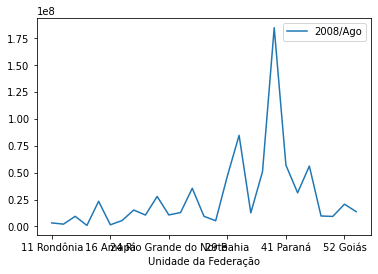

In [26]:
#Gráfico de gasto por unidade federativa
dados.plot(x = "Unidade da Federação",y = "2008/Ago")

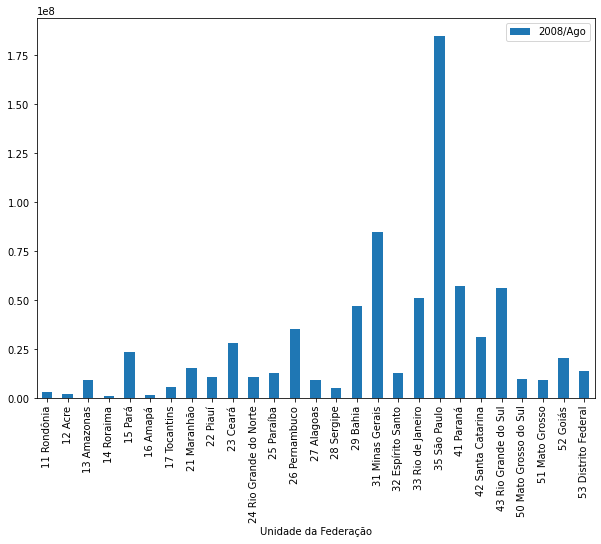

In [28]:
#Porém, o gráfico de linhas não é adequado para essa situação
#Para mudar para gráfico de barra, kind="bar"
#usa-se figsize para alterar o tamanho da figura
dados.plot(x = "Unidade da Federação",y = "2008/Ago", kind = "bar", figsize = (10,7))

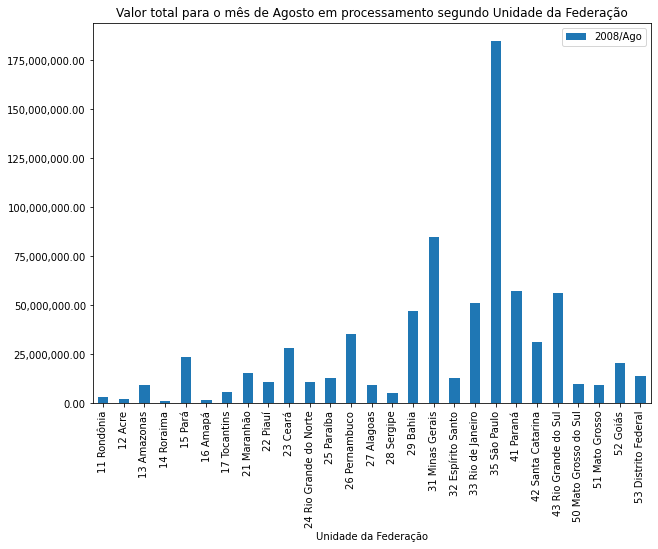

In [39]:
#Vamos importar outra biblioteca gráfica para poder utilizar melhor dos argumentos do gráfico
import matplotlib.pyplot as plt

#Biblioteca para mudar o formato dos eixos
import matplotlib.ticker as ticker

#ax = axis, ou seja, eixo X
ax = dados.plot(x = "Unidade da Federação",y = "2008/Ago", kind = "bar", figsize = (10,7))
#usamos um set para o formato ser um formato float com o separador de milhares como ","
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#Adicionando um título
plt.title("Valor total para o mês de Agosto em processamento segundo Unidade da Federação")

#Mostrar o gráfico
plt.show()